### Spaceship Titanic 데이터 분석
* 우주선에서 승객을 보낼때, 다른 차원 이송되었는지, 아닌지 예측하기
* 데이터 출처 : https://www.kaggle.com/competitions/spaceship-titanic/data

##### 대회 개요
* 우주선 타이타닉의 승객이 다른 차원으로 이송되었는지(True-1) 아닌지(False-0)

##### 데이터 설명
* train.csv - 훈련 데이터로 사용되는 승객의 약 2/3(~8700)에 대한 개인 기록.

      PassengerId- 각 승객에 대한 고유 ID입니다. 각 ID는 승객이 함께 여행하는 그룹 gggg_pp을 gggg나타내며 그룹 pp내 번호입니다. 그룹의 사람들은 종종 가족 구성원이지만 항상 그런 것은 아닙니다.
      HomePlanet- 승객이 출발한 행성, 일반적으로 영구 거주 행성입니다.
      CryoSleep- 승객이 항해 기간 동안 정지된 애니메이션에 놓이도록 선택했는지 여부를 나타냅니다. cryosleep의 승객은 객실에 국한됩니다.
      Cabin- 승객이 머물고 있는 객실 번호. 형식을 취합니다 . deck/num/side여기서 Port 또는 Starboard 가 side될 수 있습니다 .PS
      Destination- 승객이 출발할 행성입니다.
      Age- 승객의 나이.
      VIP- 승객이 항해 중 특별 VIP 서비스를 지불했는지 여부.
      RoomService, FoodCourt, ShoppingMall, - 승객이 우주선 타이타닉 의 다양한 고급 편의 시설 에 대해 청구 Spa한 VRDeck금액 입니다.
      Name- 승객의 성과 이름.
      Transported- 승객이 다른 차원으로 이송되었는지 여부. 이것은 예측하려는 대상인 열입니다.
      
* test.csv - 테스트 데이터로 사용되는 나머지 승객의 1/3(~4300)에 대한 개인 기록. Transported당신의 임무는 이 세트에 있는 승객 의 가치를 예측하는 것 입니다.

* sample_submission.csv - 올바른 형식의 제출 파일입니다.

      PassengerId- 테스트 세트의 각 승객에 대한 ID입니다.
      Transported- 목표. 각 승객에 대해 True또는 를 예측 False하십시오.

##### 라이브러리 불러오기

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

##### 데이터 불러오기

In [6]:
sub = pd.read_csv("./data/Space_Titanic/sample_submission.csv")
train = pd.read_csv("./data/Space_Titanic/train.csv")
test = pd.read_csv("./data/Space_Titanic/test.csv")

train.shape, test.shape, sub.shape

((8693, 14), (4277, 13), (4277, 2))

    학습용 데이터 셋 : 8693개 14열
    테스트용 데이터 셋 : 4277개 13열

In [7]:
print( train.columns, end="\n\n")
print( test.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')


##### 예측할 피처(특징)은 Transported
    Transported은 어떠한 값을 갖을까?

In [8]:
train['Transported'].unique()

array([False,  True])

In [9]:
test['Transported'].unique()  # test에는 예측할 컬럼이 없음. 에러 발생

KeyError: 'Transported'

     01 우선 데이터를 나누고,
     02 모델을 선택 및 학습하고, 이를 토대로 자체 평가를 토대로 모델 최종 선택
     03 마지막 선택된 모델로 test의 Transported를 예측하고 제출

##### 01 데이터 나누기

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


##### 결측치가 없고, 우선 숫자만 있는 것으로 모델을 구축해 보자.

In [12]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([8.204e+03, 1.800e+02, 7.300e+01, 2.200e+01, 1.500e+01, 6.000e+00,
        6.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([    0. ,  2240.8,  4481.6,  6722.4,  8963.2, 11204. , 13444.8,
        15685.6, 17926.4, 20167.2, 22408. ]),
 <BarContainer object of 10 artists>)

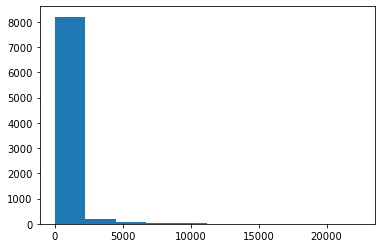

In [13]:
# 숫자이면서 결측치가 다 있음. 따라서 몇개만 결측치를 처리하고 3개만 하는 것으로 한다.
# sel = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
plt.hist(train['Spa'])

* 데이터 분포는 전부 비슷함.
* 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa' 를 전부 중앙값으로 결측치 처리하자.
* 먼저 train한 이후에 test도 진행.

In [14]:
# 비어 있는 행 선택 후, 컬럼은 'RoomService' 선택 후, 중앙값으로 넣기
train.loc[ train['RoomService'].isnull() , 'RoomService' ] = train['RoomService'].median()
train.loc[ train['FoodCourt'].isnull() , 'FoodCourt' ] = train['FoodCourt'].median()
train.loc[ train['ShoppingMall'].isnull() , 'ShoppingMall' ] = train['ShoppingMall'].median()
train.loc[ train['Spa'].isnull() , 'Spa' ] = train['Spa'].median()

# 비어 있는지 확인
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck          188
Name            200
Transported       0
dtype: int64

##### test 데이터 셋도 동일하게 처리

In [15]:
# 비어 있는 행 선택 후, 컬럼은 'RoomService' 선택 후, 중앙값으로 넣기
test.loc[ test['RoomService'].isnull() , 'RoomService' ] = test['RoomService'].median()
test.loc[ test['FoodCourt'].isnull() , 'FoodCourt' ] = test['FoodCourt'].median()
test.loc[ test['ShoppingMall'].isnull() , 'ShoppingMall'] = test['ShoppingMall'].median()
test.loc[ test['Spa'].isnull() , 'Spa' ] = test['Spa'].median()

# 비어 있는지 확인
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck           80
Name             94
dtype: int64

In [16]:
train['Transported'].unique()

array([False,  True])

In [17]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [18]:
a = train.iloc[ 0, -1]

In [19]:
print(a, type(a))

False <class 'numpy.bool_'>


In [20]:
print(train.Transported.unique())
train.head()

[False  True]


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [21]:
# train['Transported'] = train['Transported'].astype()

##### 우선 결측치 처리된 컬럼을 이용해 보자.

In [22]:
sel = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa']

X = train[sel]
y = train['Transported']

last_test = test[sel]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3,
                                                   random_state = 0)

y_train.shape

(6085,)

In [23]:
X_train.info(), X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6085 entries, 7289 to 2732
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RoomService   6085 non-null   float64
 1   FoodCourt     6085 non-null   float64
 2   ShoppingMall  6085 non-null   float64
 3   Spa           6085 non-null   float64
dtypes: float64(4)
memory usage: 237.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2608 entries, 3601 to 5117
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RoomService   2608 non-null   float64
 1   FoodCourt     2608 non-null   float64
 2   ShoppingMall  2608 non-null   float64
 3   Spa           2608 non-null   float64
dtypes: float64(4)
memory usage: 101.9 KB


(None, None)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)
print("학습용 정확도 : ", model1.score(X_train,y_train) )
print("테스트용 정확도 : ", model1.score(X_test,y_test) )

학습용 정확도 :  0.8042728019720624
테스트용 정확도 :  0.7473159509202454


In [26]:
model2 = DecisionTreeClassifier(max_depth=3, random_state=0)
model2.fit(X_train, y_train)
print("학습용 정확도 : ", model2.score(X_train,y_train) )
print("테스트용 정확도 : ", model2.score(X_test,y_test) )

학습용 정확도 :  0.7410024650780608
테스트용 정확도 :  0.7315950920245399


In [27]:
model3 = RandomForestClassifier(max_depth=3, random_state=0)
model3.fit(X_train, y_train)
print("학습용 정확도 : ", model3.score(X_train,y_train) )
print("테스트용 정확도 : ", model3.score(X_test,y_test) )

학습용 정확도 :  0.752670501232539
테스트용 정확도 :  0.7430981595092024


##### knn 모델이 좋아보임. 우선은 이걸로 최종 모델을 해 본다. k값은 최적으로 맞춘다.

In [28]:
k_num = range(1, 40, 2)

for num in k_num:
    model1 = KNeighborsClassifier(n_neighbors=num)
    model1.fit(X_train, y_train)
    
    print("k 값 : ", num)
    print("학습용 정확도 : ", model1.score(X_train,y_train) )
    print("테스트용 정확도 : ", model1.score(X_test,y_test) )

k 값 :  1
학습용 정확도 :  0.9061626951520132
테스트용 정확도 :  0.7181748466257669
k 값 :  3
학습용 정확도 :  0.8202136400986031
테스트용 정확도 :  0.74079754601227
k 값 :  5
학습용 정확도 :  0.8042728019720624
테스트용 정확도 :  0.7473159509202454
k 값 :  7
학습용 정확도 :  0.7980279375513558
테스트용 정확도 :  0.7492331288343558
k 값 :  9
학습용 정확도 :  0.7932621199671323
테스트용 정확도 :  0.7569018404907976
k 값 :  11
학습용 정확도 :  0.7891536565324568
테스트용 정확도 :  0.7595858895705522
k 값 :  13
학습용 정확도 :  0.7873459326211997
테스트용 정확도 :  0.7649539877300614
k 값 :  15
학습용 정확도 :  0.7870172555464257
테스트용 정확도 :  0.7668711656441718
k 값 :  17
학습용 정확도 :  0.7865242399342646
테스트용 정확도 :  0.7684049079754601
k 값 :  19
학습용 정확도 :  0.7837304847986853
테스트용 정확도 :  0.7695552147239264
k 값 :  21
학습용 정확도 :  0.7838948233360723
테스트용 정확도 :  0.7695552147239264
k 값 :  23
학습용 정확도 :  0.7820870994248151
테스트용 정확도 :  0.7699386503067485
k 값 :  25
학습용 정확도 :  0.7817584223500411
테스트용 정확도 :  0.7680214723926381
k 값 :  27
학습용 정확도 :  0.7799506984387838
테스트용 정확도 :  0.7680214723926381
k 값 :  29
학습용

    k=23일때가 가장 좋음. 최종 모델을 k=23으로 하자.

In [29]:
model1 = KNeighborsClassifier(n_neighbors=23)
model1.fit(X_train, y_train)
pred = model1.predict(last_test)
pred[0:10]

array([ True, False,  True,  True, False, False,  True,  True,  True,
       False])

In [30]:
### 제출용 파일 생성
sub.columns

Index(['PassengerId', 'Transported'], dtype='object')

In [31]:
sub['Transported'] = pred
sub.to_csv("./data/Space_Titanic/first_sub.csv", index=False)

    베이스라인 모델 점수 : Score: 0.78068